In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


In [3]:
def load_mnist_data(batch_size_train, batch_size_test):
    train_set = datasets.MNIST('data', train=True, download=True, 
                               transform=transforms.Compose([transforms.ToTensor()]))
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size_train, shuffle=True)

    test_set = datasets.MNIST('data', train=False, download=True, 
                              transform=transforms.Compose([transforms.ToTensor()]))
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size_test, shuffle=True)

    return (train_loader, test_loader)

In [6]:
class SmallModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 5)
        self.fc2 = nn.Linear(5, 9)
        self.fc3 = nn.Linear(9, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 25)
        self.fc2 = nn.Linear(25, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 60)
        self.fc2 = nn.Linear(60, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model5(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 200)
        self.fc3 = nn.Linear(200, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 150)
        self.fc2 = nn.Linear(150, 300)
        self.fc3 = nn.Linear(300, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model7(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 400)
        self.fc3 = nn.Linear(400, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model8(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 250)
        self.fc2 = nn.Linear(250, 500)
        self.fc3 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model9(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 280)
        self.fc2 = nn.Linear(280, 560)
        self.fc3 = nn.Linear(560, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model10(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 350)
        self.fc2 = nn.Linear(350, 600)
        self.fc3 = nn.Linear(600, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
batch_size_train = 50
batch_size_test = 100
train_loader, test_loader = load_mnist_data(batch_size_train, batch_size_test)
epochs = 8

In [8]:
def calculate_params(model):
    return sum(p.numel() for p in model.parameters())

# Define optimizer
def get_optimizer(model):
    return optim.Adam(model.parameters(), lr=0.0001)

In [9]:
def train_model(model, optimizer, data_loader, loss_function):
    model.train()
    for batch_idx, (data, target) in enumerate(data_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data.view(-1, 784))
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

In [10]:
def evaluate_model(model, loader, loss_function):
    correct_predictions = 0
    total_predictions = 0
    total_loss = 0
    num_batches = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            loss = loss_function(output, target)
            total_loss += loss
            num_batches += 1
            for i, output_tensor in enumerate(output):
                if torch.argmax(output_tensor) == target[i]:
                    correct_predictions += 1
                total_predictions += 1
    return total_loss / num_batches, round(correct_predictions / total_predictions, 3)

In [11]:
def run_training(model, optimizer):
    loss_function = torch.nn.CrossEntropyLoss()
    for epoch in range(epochs):
        train_model(model, optimizer, train_loader, loss_function)
        train_loss, train_accuracy = evaluate_model(model, train_loader, loss_function)
        test_loss, test_accuracy = evaluate_model(model, test_loader, loss_function)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    param_list.append(calculate_params(model))
    print(f"Model Training Loss: {train_loss}")
    print(f"Model Test Loss: {test_loss}")
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

In [12]:
train_loss_list = []
test_loss_list = []
param_list = []
train_accuracy_list = []
test_accuracy_list = []


In [13]:
models = [SmallModel(), Model2(), Model3(), Model4(), Model5(), Model6(), Model7(), Model8(), Model9(), Model10()]
for idx, model in enumerate(models, 1):
    print(f"Model {idx} parameters: {calculate_params(model)}")
    optimizer = get_optimizer(model)
    run_training(model, optimizer)

Model 1 parameters: 4079
Model Training Loss: 0.630704402923584
Model Test Loss: 0.6054881811141968
Model 2 parameters: 21435
Model Training Loss: 0.2464347779750824
Model Test Loss: 0.24537411332130432
Model 3 parameters: 45360
Model Training Loss: 0.18714749813079834
Model Test Loss: 0.19035620987415314
Model 4 parameters: 55630
Model Training Loss: 0.17448019981384277
Model Test Loss: 0.18058523535728455
Model 5 parameters: 100710
Model Training Loss: 0.13345669209957123
Model Test Loss: 0.14323364198207855
Model 6 parameters: 166060
Model Training Loss: 0.10463398694992065
Model Test Loss: 0.11756119132041931
Model 7 parameters: 241410
Model Training Loss: 0.08406135439872742
Model Test Loss: 0.10102527588605881
Model 8 parameters: 326760
Model Training Loss: 0.07089974731206894
Model Test Loss: 0.09220314770936966
Model 9 parameters: 382770
Model Training Loss: 0.061843883246183395
Model Test Loss: 0.08556853234767914
Model 10 parameters: 491360
Model Training Loss: 0.053872808814

In [14]:
train_losses_np = [x.data.numpy().tolist() for x in train_loss_list]
test_losses_np = [x.data.numpy().tolist() for x in test_loss_list]

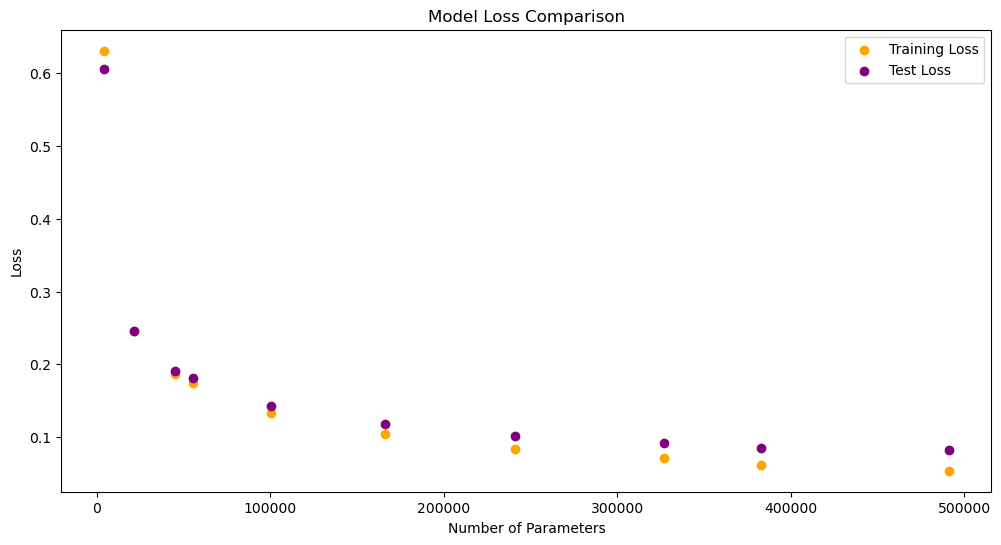

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(param_list, train_losses_np, color='orange')
plt.scatter(param_list, test_losses_np, color='purple')
plt.title('Model Loss Comparison')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.show()

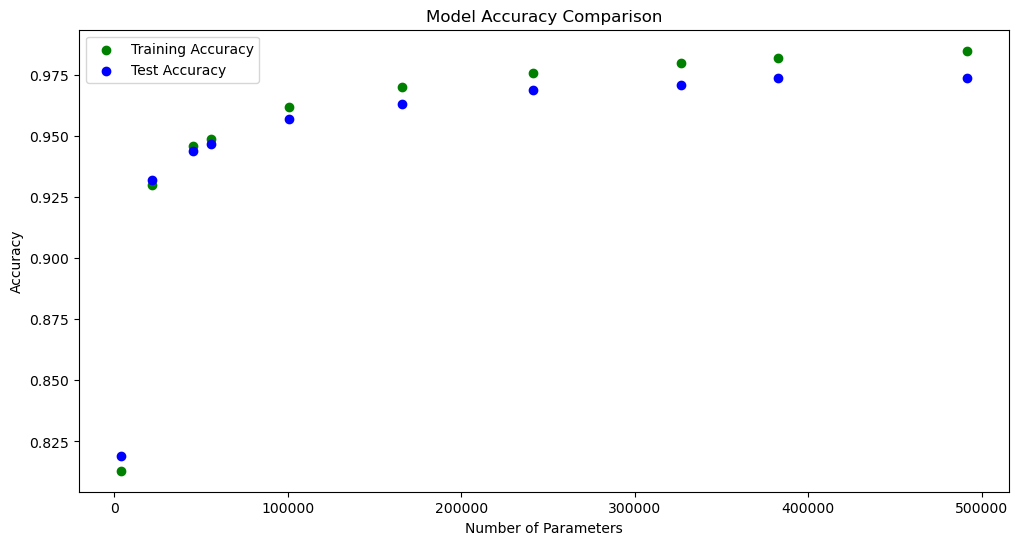

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(param_list, train_accuracy_list, color='green')
plt.scatter(param_list, test_accuracy_list, color='blue')
plt.title('Model Accuracy Comparison')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.show()